In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc

In [2]:
pd.set_option('display.max_rows', 10000)

### 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE ([LINK](https://github.com/CSSEGISandData/COVID-19)) 

In [3]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [4]:
df_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188


In [5]:
df_deaths.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,746,774,807,819,826,864,898,920,936,957
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,62,65,69,72,74,76,79,81,83,83


In [6]:
df_covid19.head(2)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-07-10 10:34:20,-25.0000,133.0000,9359.0,106.0,7626.0,1627.0,36.760056,NaN,NaN,1.132600,36,AUS
1,Austria,2020-07-10 10:34:20,47.5162,14.5501,18709.0,706.0,16808.0,1195.0,207.730059,NaN,NaN,3.773585,40,AUT


In [7]:
df_table.head(2)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/23


### Preprocessing

In [8]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]
df_covid19.head(2)

,country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Australia,2020-07-10 10:34:20,-25.0000,133.0000,9359.0,106.0,7626.0,1627.0,36.760056
1,Austria,2020-07-10 10:34:20,47.5162,14.5501,18709.0,706.0,16808.0,1195.0,207.730059


In [9]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])

In [10]:
df_table = df_table[df_table["continent"] != "Others"]
print(df_table.shape)
df_table.loc[df_table.Incident_Rate.isnull()]

(40460, 17)


,Country_Region,continent,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String
33490,USA,North America,2020-01-22,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/22
33491,USA,North America,2020-01-23,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/23
33492,USA,North America,2020-01-24,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/24
33493,USA,North America,2020-01-25,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/25
33494,USA,North America,2020-01-26,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/26
33495,USA,North America,2020-01-27,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/27
33496,USA,North America,2020-01-28,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/28
33497,USA,North America,2020-01-29,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/29
33498,USA,North America,2020-01-30,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/30
33499,USA,North America,2020-01-31,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Diamond Princess,88888.0,84088888,USA,2020/01/31


In [11]:
# Checking Null values and the counts
df_table.isnull().sum()


Country_Region             0
continent                  0
Last_Update                0
Confirmed                  0
Deaths                     0
Recovered              40460
Active                 40460
Delta_Confirmed           60
Delta_Recovered        40460
Incident_Rate            340
People_Tested          40460
People_Hospitalized    40460
Province_State         30600
FIPS                   30600
UID                        0
iso3                       0
Report_Date_String         0
dtype: int64

In [12]:
# Removing the columns which cannot be imputed
table_columns_removal = ['Recovered', 'Active', 'Delta_Recovered', 'People_Tested', 'People_Hospitalized',
                         'Province_State', 'FIPS']
df_table = df_table.drop(table_columns_removal, axis = 1)

In [13]:
# As there are no pattern on suspected confirmed cases, imputing na values with 0
df_table['Delta_Confirmed'].fillna(0, inplace = True)


In [14]:
df_confirmed.isnull().sum()

state        185
country        0
continent      0
Lat            0
Long           0
1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
1/27/20        0
1/28/20        0
1/29/20        0
1/30/20        0
1/31/20        0
2/1/20         0
2/2/20         0
2/3/20         0
2/4/20         0
2/5/20         0
2/6/20         0
2/7/20         0
2/8/20         0
2/9/20         0
2/10/20        0
2/11/20        0
2/12/20        0
2/13/20        0
2/14/20        0
2/15/20        0
2/16/20        0
2/17/20        0
2/18/20        0
2/19/20        0
2/20/20        0
2/21/20        0
2/22/20        0
2/23/20        0
2/24/20        0
2/25/20        0
2/26/20        0
2/27/20        0
2/28/20        0
2/29/20        0
3/1/20         0
3/2/20         0
3/3/20         0
3/4/20         0
3/5/20         0
3/6/20         0
3/7/20         0
3/8/20         0
3/9/20         0
3/10/20        0
3/11/20        0
3/12/20        0
3/13/20        0
3/14/20        0
3/15/20       

In [15]:
# Removing State column
df_confirmed = df_confirmed.drop('state', axis = 1)
df_confirmed.head(2)

,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,Afghanistan,Asia,33.0000,65.0000,0,0,0,0,0,0,...,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908
1,Albania,Europe,41.1533,20.1683,0,0,0,0,0,0,...,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188


In [16]:
df_deaths.isnull().sum()

state        185
country        0
continent      0
Lat            0
Long           0
1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
1/27/20        0
1/28/20        0
1/29/20        0
1/30/20        0
1/31/20        0
2/1/20         0
2/2/20         0
2/3/20         0
2/4/20         0
2/5/20         0
2/6/20         0
2/7/20         0
2/8/20         0
2/9/20         0
2/10/20        0
2/11/20        0
2/12/20        0
2/13/20        0
2/14/20        0
2/15/20        0
2/16/20        0
2/17/20        0
2/18/20        0
2/19/20        0
2/20/20        0
2/21/20        0
2/22/20        0
2/23/20        0
2/24/20        0
2/25/20        0
2/26/20        0
2/27/20        0
2/28/20        0
2/29/20        0
3/1/20         0
3/2/20         0
3/3/20         0
3/4/20         0
3/5/20         0
3/6/20         0
3/7/20         0
3/8/20         0
3/9/20         0
3/10/20        0
3/11/20        0
3/12/20        0
3/13/20        0
3/14/20        0
3/15/20       

In [17]:
# Removing State column
df_deaths = df_deaths.drop('state', axis = 1)
df_deaths.head(2)

,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,Afghanistan,Asia,33.0000,65.0000,0,0,0,0,0,0,...,746,774,807,819,826,864,898,920,936,957
1,Albania,Europe,41.1533,20.1683,0,0,0,0,0,0,...,62,65,69,72,74,76,79,81,83,83


In [18]:
df_covid19.isnull().sum()

country          0
continent        0
Last_Update      0
Lat              2
Long_            2
Confirmed        0
Deaths           0
Recovered        2
Active           2
Incident_Rate    2
dtype: int64

In [19]:
df_covid19.loc[df_covid19.country == 'MS Zaandam']

,country,continent,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
116,MS Zaandam,Others,2020-07-10 10:34:20,NaN,NaN,9.0,2.0,NaN,NaN,NaN


In [20]:
df_covid19 = df_covid19.drop(df_covid19.index[116])

In [21]:
df_covid19 = df_covid19.reset_index(drop = True)

In [22]:
df_covid19

,country,continent,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Australia,Australia,2020-07-10 10:34:20,-25.000000,133.000000,9359.0,106.0,7626.0,1627.0,36.760056
1,Austria,Europe,2020-07-10 10:34:20,47.516200,14.550100,18709.0,706.0,16808.0,1195.0,207.730059
2,Canada,North America,2020-07-10 10:34:20,60.001000,-95.001000,108656.0,8797.0,72095.0,27764.0,287.026773
3,China,Asia,2020-07-10 10:34:20,30.592800,114.305500,84992.0,4641.0,79802.0,549.0,6.050647
4,Denmark,Europe,2020-07-10 10:34:20,56.263900,9.501800,13117.0,609.0,12246.0,262.0,226.459604
5,Finland,Europe,2020-07-10 10:34:20,61.924100,25.748200,7279.0,329.0,6800.0,150.0,131.372865
6,France,Europe,2020-07-10 10:34:20,46.227600,2.213700,207356.0,29982.0,78295.0,99079.0,317.672504
7,Germany,Europe,2020-07-10 10:34:20,51.165691,10.451526,199218.0,9061.0,183950.0,6207.0,237.775865
8,Iceland,Europe,2020-07-10 10:34:20,64.963100,-19.020800,1882.0,10.0,1854.0,18.0,551.501832
9,Ireland,Europe,2020-07-10 10:34:20,53.142400,-7.692100,25565.0,1743.0,23364.0,458.0,517.741114


In [23]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

In [24]:
df_countries_cases.head(2)

,Confirmed,Deaths,Recovered,Active,Incident_Rate
country,,,,,
Australia,9359.0,106.0,7626.0,1627.0,36.760056
Austria,18709.0,706.0,16808.0,1195.0,207.730059


In [25]:
df_continents_cases.head(2)

,Confirmed,Deaths,Recovered,Active,Incident_Rate
continent,,,,,
Africa,542192.0,12464.0,263264.0,266464.0,3341.538980
Asia,2803172.0,66980.0,1931671.0,804521.0,13868.193238


In [26]:
df_t = pd.DataFrame(df_countries_cases.sum()).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t


,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
0,12291636.0,555484.0,6759602.0,4907717.0,42341.838495,4.52


In [27]:
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
continent,,,,,,
Africa,542192.0,12464.0,263264.0,266464.0,3341.538980,2.30
Asia,2803172.0,66980.0,1931671.0,804521.0,13868.193238,2.39
Australia,10938.0,128.0,9149.0,1661.0,71.760238,1.17
Europe,2532038.0,195682.0,1434868.0,832655.0,14505.921894,7.73
North America,3673822.0,179706.0,1323225.0,2170891.0,3905.991867,4.89
Others,10399.0,133.0,3537.0,6729.0,1816.195219,1.28
South America,2719075.0,100391.0,1793888.0,824796.0,4832.237059,3.69


In [28]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
country,,,,,,
Australia,9359.0,106.0,7626.0,1627.0,36.760056,1.13
Austria,18709.0,706.0,16808.0,1195.0,207.730059,3.77
Canada,108656.0,8797.0,72095.0,27764.0,287.026773,8.10
China,84992.0,4641.0,79802.0,549.0,6.050647,5.46
Denmark,13117.0,609.0,12246.0,262.0,226.459604,4.64
Finland,7279.0,329.0,6800.0,150.0,131.372865,4.52
France,207356.0,29982.0,78295.0,99079.0,317.672504,14.46
Germany,199218.0,9061.0,183950.0,6207.0,237.775865,4.55
Iceland,1882.0,10.0,1854.0,18.0,551.501832,0.53


In [29]:
df_country_specific_mr = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_Africa        = df_country_specific_mr[df_country_specific_mr.continent == 'Africa']
df_Europe        = df_country_specific_mr[df_country_specific_mr.continent == 'Europe']
df_Asia          = df_country_specific_mr[df_country_specific_mr.continent == 'Asia']
df_North_America = df_country_specific_mr[df_country_specific_mr.continent == 'North America']
df_South_America = df_country_specific_mr[df_country_specific_mr.continent == 'South America']
df_Australia     = df_country_specific_mr[df_country_specific_mr.continent == 'Australia']
df_others        = df_country_specific_mr[df_country_specific_mr.continent == 'Others']

for continent in [df_Africa, df_Europe, df_Asia, df_North_America, df_South_America, df_Australia, df_others]:
    continent.index = continent["country"]
    continent.drop(['country'],axis=1, inplace = True)
    continent["Mortality Rate (per 100)"] = np.round(100*continent["Deaths"]/continent["Confirmed"],2)

C:\Users\Loki\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Loki\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [30]:
df_Africa.head(2)

,continent,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
country,,,,,,,
Algeria,Africa,17808.0,988.0,12637.0,4183.0,40.610209,5.55
Angola,Africa,396.0,22.0,117.0,257.0,1.204883,5.56


### Exploratory Data Analysis

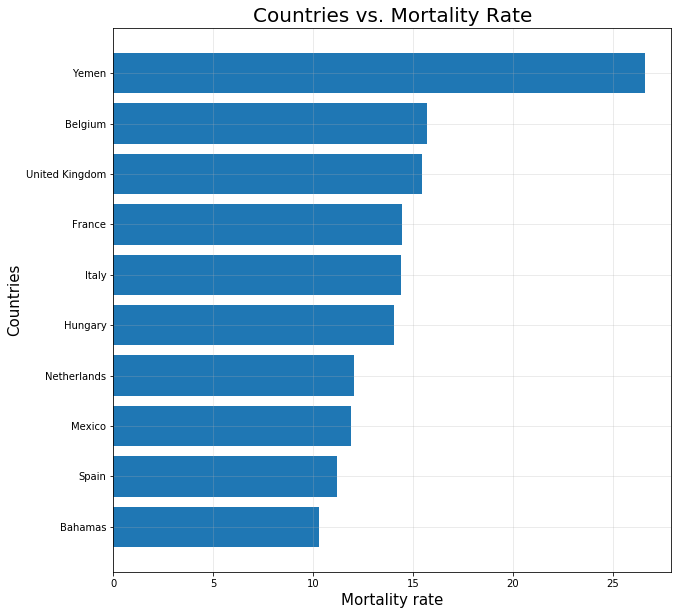

In [31]:
# High mortality rate in countries
plt.figure(figsize = (10,10))
plt.barh(df_countries_cases.sort_values('Mortality Rate (per 100)').index[-10:], df_countries_cases.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values[-10:])
plt.title('Countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

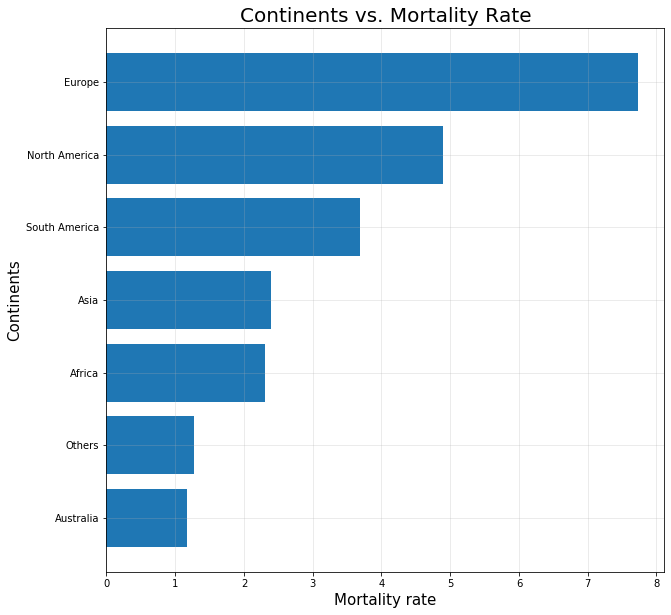

In [32]:
# High mortality rate in continents
plt.figure(figsize = (10,10))
plt.barh(df_continents_cases.sort_values('Mortality Rate (per 100)').index, df_continents_cases.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('Continents vs. Mortality Rate', fontsize = 20)
plt.ylabel('Continents', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

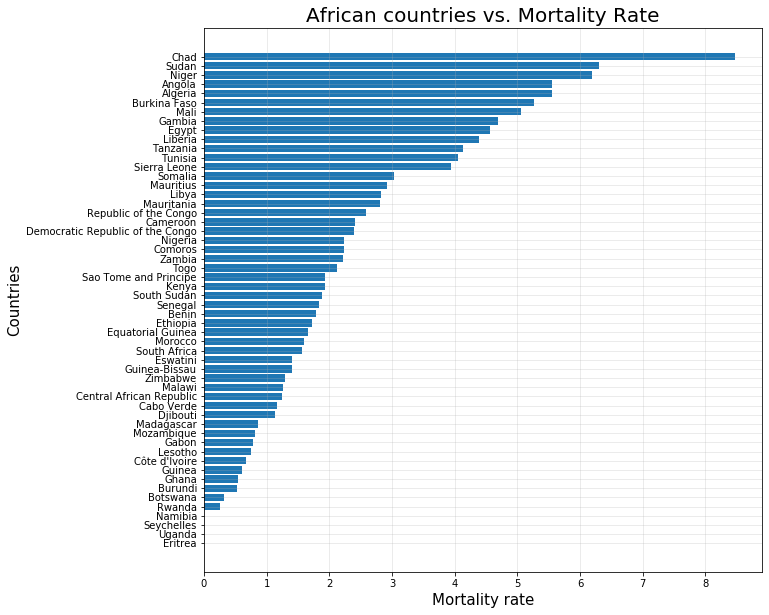

In [33]:
# Top 10 countries with High mortality rate under each continent
# Africa
plt.figure(figsize = (10,10))
plt.barh(df_Africa.sort_values('Mortality Rate (per 100)').index, df_Africa.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('African countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

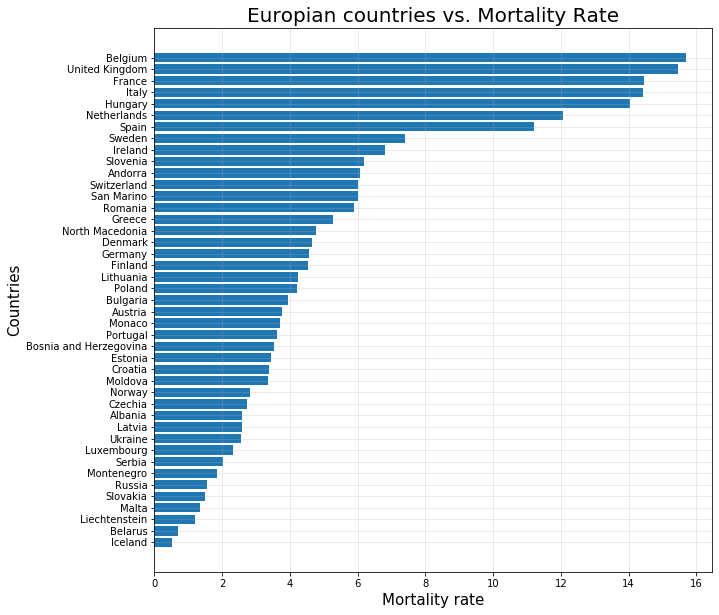

In [34]:
# Europe
plt.figure(figsize = (10,10))
plt.barh(df_Europe.sort_values('Mortality Rate (per 100)').index, df_Europe.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('Europian countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

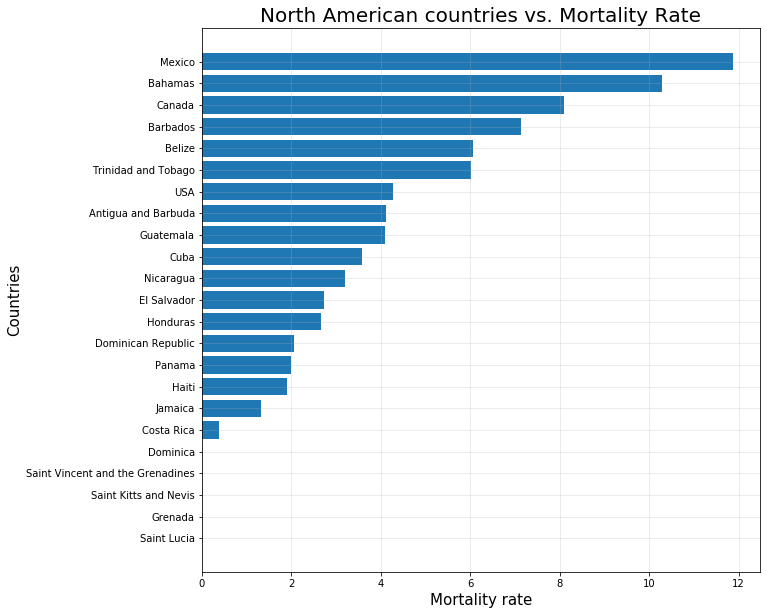

In [35]:
# North America
plt.figure(figsize = (10,10))
plt.barh(df_North_America.sort_values('Mortality Rate (per 100)').index, df_North_America.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('North American countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

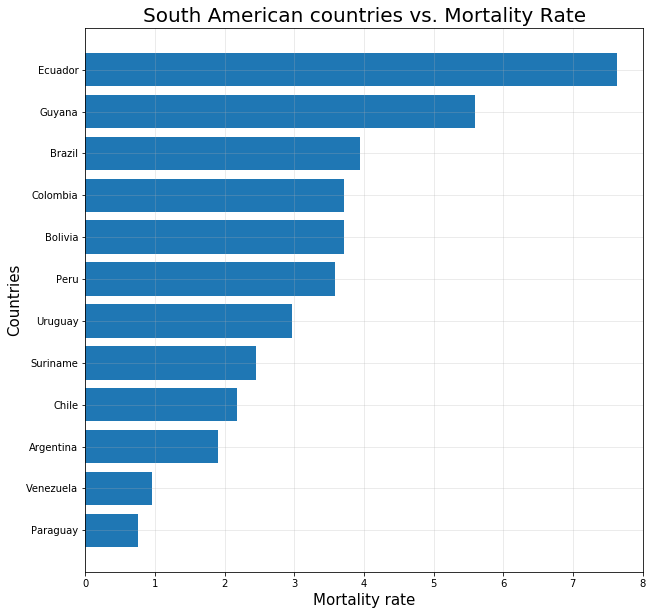

In [36]:
# South America
plt.figure(figsize = (10,10))
plt.barh(df_South_America.sort_values('Mortality Rate (per 100)').index, df_South_America.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('South American countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

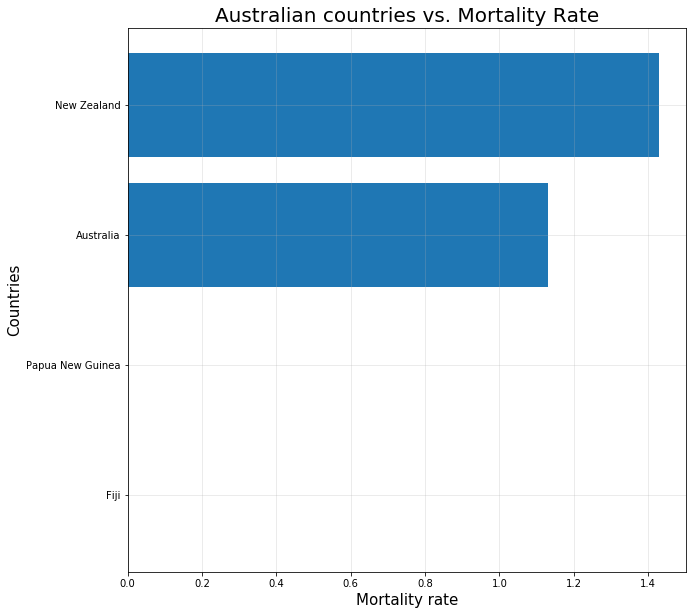

In [37]:
# Australia
plt.figure(figsize = (10,10))
plt.barh(df_Australia.sort_values('Mortality Rate (per 100)').index, df_Australia.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('Australian countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

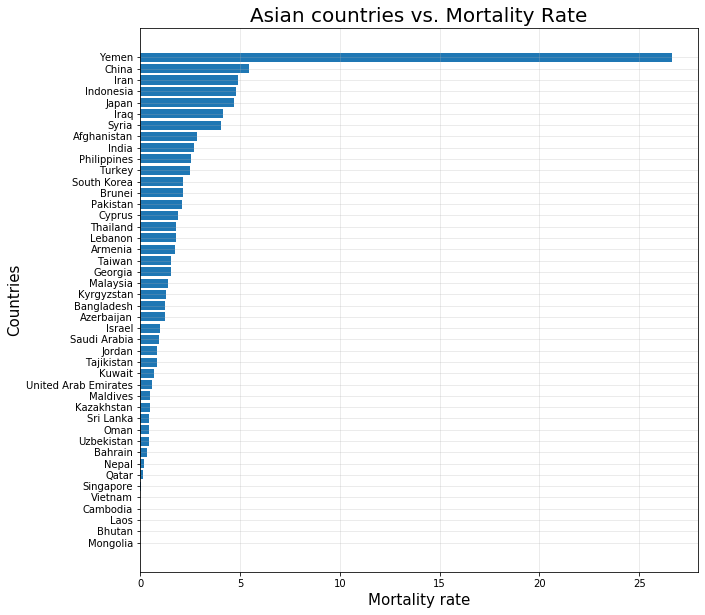

In [38]:
# Asia
plt.figure(figsize = (10,10))
plt.barh(df_Asia.sort_values('Mortality Rate (per 100)').index, df_Asia.sort_values('Mortality Rate (per 100)')['Mortality Rate (per 100)'].values)
plt.title('Asian countries vs. Mortality Rate', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.xlabel('Mortality rate', fontsize = 15)
plt.grid(alpha=0.3)

### Mortality rate for each week

In [39]:
df_confirmed.head(2)

,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,Afghanistan,Asia,33.0000,65.0000,0,0,0,0,0,0,...,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908
1,Albania,Europe,41.1533,20.1683,0,0,0,0,0,0,...,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188


In [40]:
df_deaths.head(2)

,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
0,Afghanistan,Asia,33.0000,65.0000,0,0,0,0,0,0,...,746,774,807,819,826,864,898,920,936,957
1,Albania,Europe,41.1533,20.1683,0,0,0,0,0,0,...,62,65,69,72,74,76,79,81,83,83


In [41]:
confirmed_mr = df_confirmed.drop(['continent', 'Lat', 'Long'], axis = 1).set_index('country').transpose()
deaths_mr = df_deaths.drop(['continent', 'Lat', 'Long'], axis = 1).set_index('country').transpose()

In [57]:
confirmed_mr.index = pd.to_datetime(confirmed_mr.index, infer_datetime_format=True)

In [80]:
confirmed_mr.head(2)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
mortality_rate_India = confirmed_mr.India.resample('W').mean()
mortality_rate_India

2020-01-26         0.000000
2020-02-02         0.714286
2020-02-09         3.000000
2020-02-16         3.000000
2020-02-23         3.000000
2020-03-01         3.000000
2020-03-08        24.571429
2020-03-15        75.857143
2020-03-22       225.857143
2020-03-29       759.571429
2020-04-05      2346.571429
2020-04-12      6854.142857
2020-04-19     13625.857143
2020-04-26     23109.857143
2020-05-03     35451.571429
2020-05-10     56405.571429
2020-05-17     82463.142857
2020-05-24    118830.000000
2020-05-31    166448.857143
2020-06-07    227055.714286
2020-06-14    298364.714286
2020-06-21    382202.142857
2020-06-28    492290.571429
2020-07-05    628771.285714
2020-07-12    755794.750000
Freq: W-SUN, Name: India, dtype: float64

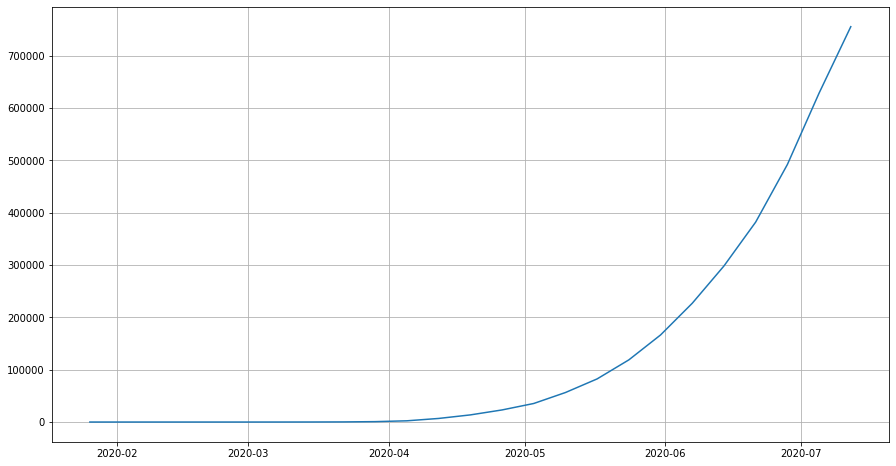

In [94]:
plt.figure(figsize = (15,8))
plt.grid()
plt.plot(mortality_rate_India)

In [102]:
def Mortality_rate():
    country_input = input('Country name: ')
    mortality_rate_country = confirmed_mr[country_input].resample('W').mean()
    df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
    print(mortality_rate_country)
    plt.figure(figsize = (15,8))
    plt.title(country_input , fontsize = 20)
    plt.ylabel('Mortality rate', fontsize = 15)
    plt.xlabel('Date', fontsize = 15)
    plt.grid(alpha=0.3)
    plt.plot(mortality_rate_country)
    
    


Country name: India
2020-01-26         0.000000
2020-02-02         0.714286
2020-02-09         3.000000
2020-02-16         3.000000
2020-02-23         3.000000
2020-03-01         3.000000
2020-03-08        24.571429
2020-03-15        75.857143
2020-03-22       225.857143
2020-03-29       759.571429
2020-04-05      2346.571429
2020-04-12      6854.142857
2020-04-19     13625.857143
2020-04-26     23109.857143
2020-05-03     35451.571429
2020-05-10     56405.571429
2020-05-17     82463.142857
2020-05-24    118830.000000
2020-05-31    166448.857143
2020-06-07    227055.714286
2020-06-14    298364.714286
2020-06-21    382202.142857
2020-06-28    492290.571429
2020-07-05    628771.285714
2020-07-12    755794.750000
Freq: W-SUN, Name: India, dtype: float64


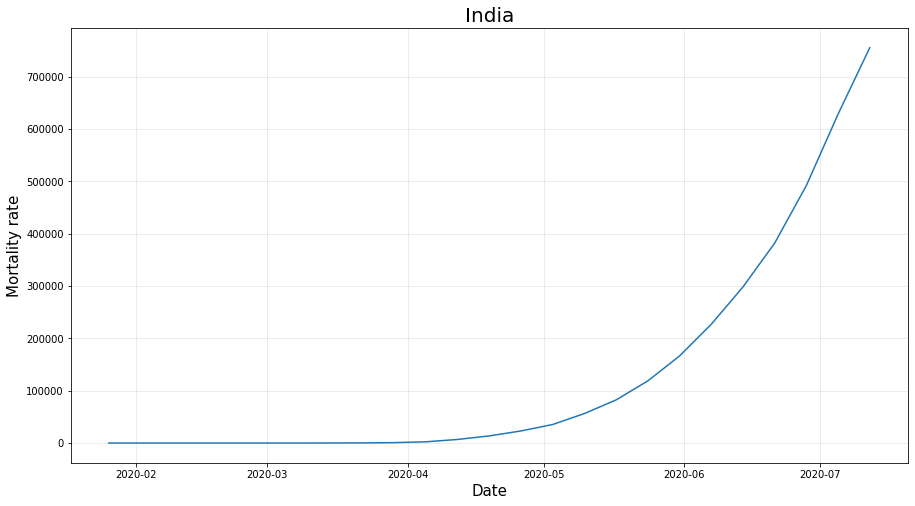

In [103]:
Mortality_rate()